#  Import the Fashion MNIST Dataset


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.0.1


In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
type(mnist)

module

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
class_names = ['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

## Data Exploration

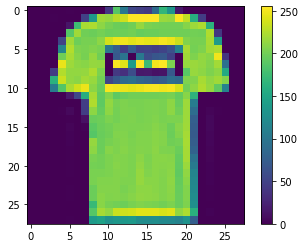

In [8]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [9]:
x_train = x_train/255.0 # Scale the array
x_test = x_test/255.0   # Into 0 and 1

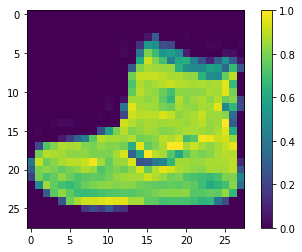

In [10]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

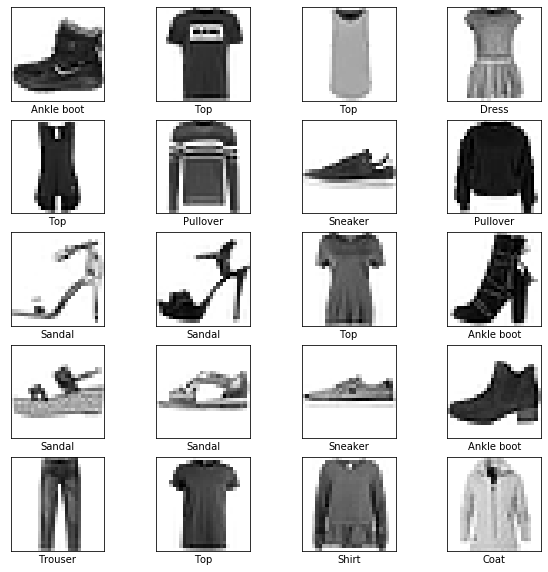

In [31]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Build the Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


## Loss Function

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
history = model.fit(x_train,y_train,epochs=15, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 6s 119us/sample - loss: 0.5076 - accuracy: 0.8203 - val_loss: 0.4076 - val_accuracy: 0.8547
Epoch 2/15
48000/48000 [==============================] - 5s 104us/sample - loss: 0.3755 - accuracy: 0.8635 - val_loss: 0.3699 - val_accuracy: 0.8691
Epoch 3/15
48000/48000 [==============================] - 5s 103us/sample - loss: 0.3360 - accuracy: 0.8766 - val_loss: 0.3694 - val_accuracy: 0.8665
Epoch 4/15
48000/48000 [==============================] - 5s 106us/sample - loss: 0.3110 - accuracy: 0.8862 - val_loss: 0.3348 - val_accuracy: 0.8790
Epoch 5/15
48000/48000 [==============================] - 5s 106us/sample - loss: 0.2940 - accuracy: 0.8909 - val_loss: 0.3290 - val_accuracy: 0.8814
Epoch 6/15
48000/48000 [==============================] - 5s 110us/sample - loss: 0.2763 - accuracy: 0.8963 - val_loss: 0.3308 - val_accuracy: 0.8823
Epoch 7/15
48000/48000 [==========================

## Plot the training curves for accuracy and loss

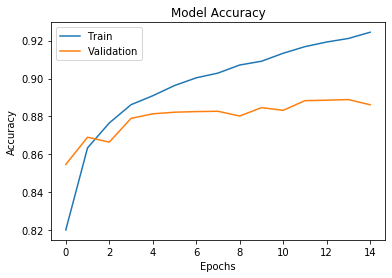

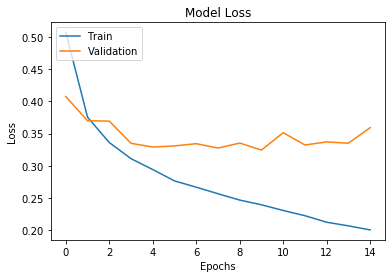

In [24]:
# Plot accuracy Values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

 # Plot loss Values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

## Predict with the testing set

In [29]:
predictions = model.predict(x_test)

In [27]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

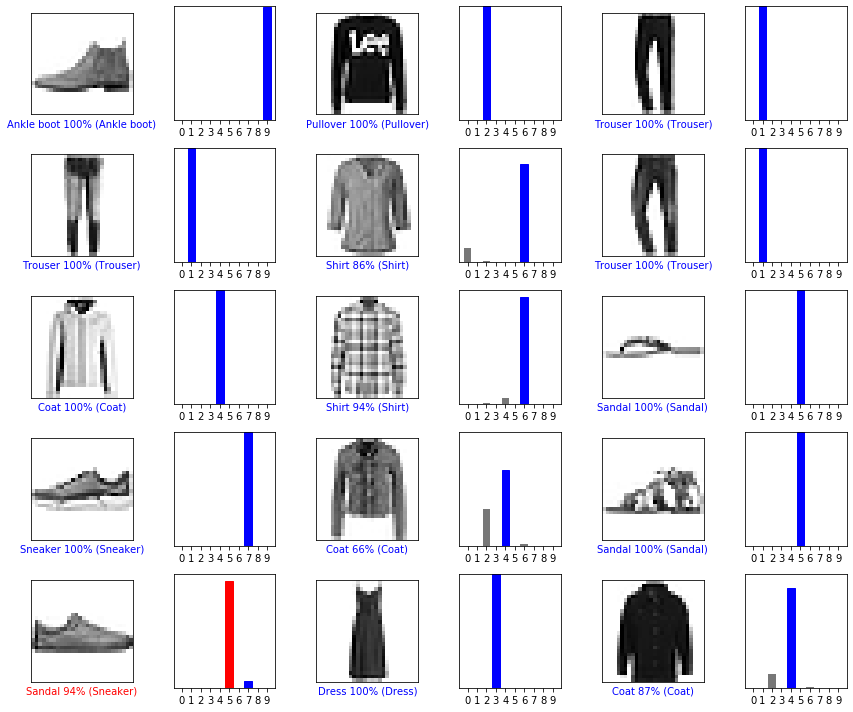

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
y_pred = model.predict_classes(x_test)
accuracy_score(y_test,y_pred)

0.8792

In [26]:
pred = model.predict(x_test)

In [27]:
pred

array([[2.3172220e-09, 3.7787426e-11, 4.6809280e-12, ..., 2.8919626e-03,
        4.2448240e-09, 9.9646205e-01],
       [2.5353288e-06, 3.8379110e-14, 9.9978155e-01, ..., 3.9693408e-15,
        1.0523000e-08, 2.0725132e-16],
       [1.7344806e-09, 1.0000000e+00, 3.6657877e-12, ..., 1.8675515e-26,
        2.4801355e-16, 1.8980329e-18],
       ...,
       [2.0073539e-05, 5.6933741e-10, 2.3396680e-05, ..., 1.0852599e-09,
        9.9986720e-01, 5.1033661e-12],
       [9.6704944e-08, 9.9998522e-01, 3.2030585e-09, ..., 1.9042547e-12,
        5.9596195e-10, 1.3382445e-09],
       [1.0751521e-05, 7.7359033e-08, 1.2340436e-06, ..., 2.5148406e-03,
        8.8634522e-05, 1.3496757e-04]], dtype=float32)

In [28]:
pred[0]

array([2.3172220e-09, 3.7787426e-11, 4.6809280e-12, 1.9237723e-13,
       2.5206155e-11, 6.4602669e-04, 2.4205768e-08, 2.8919626e-03,
       4.2448240e-09, 9.9646205e-01], dtype=float32)

In [29]:
np.argmax(pred[0])

9

In [30]:
np.argmax(pred[1])

2